In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [50]:
seed_max = 31
df = pd.DataFrame()
for i in range(seed_max):
    try:
        df = pd.concat([df, pd.read_csv("results_4_22/results_synthetic_"+str(i)+".csv")])
    except:
        pass
    

In [3]:
df

,Dataset,Train_Length,Test_Length,Std_Pert_y,Bias_Range,Std_Range,Bias_Drift_range,Std_Drift_Range,y_Bias_Drift_range,y_Std_Drift_Range,...,Val,Train_test_split,Method,MAE,MAPE,RMSE,R2,CVAR_05,CVAR_15,Time
0,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,mean,0.114068,54.573058,0.138624,0.962602,0.300319,0.251043,0
1,synthetic,3001,998,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,last_timestep,0.110999,57.860884,0.140048,0.961867,0.336577,0.266247,0
2,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,best_model,0.272066,137.898660,0.331596,0.786012,0.732359,0.601285,0
3,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,bandits_full,0.272066,137.898660,0.331596,0.786012,0.732359,0.601285,0
4,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,bandits_recent,0.155707,79.786917,0.197514,0.924078,0.480010,0.373599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,ridge,0.118131,72.095378,0.147660,0.957568,0.341414,0.277882,17386
799,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,adaptive_ridge_exact,0.133139,78.505722,0.171831,0.942539,0.425237,0.332766,1573921
800,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,adaptive_ridge_standard,0.135304,80.236517,0.174768,0.940558,0.431997,0.338291,1825397
801,synthetic,3001,999,0.1,0.5,0.5,0.5,0.5,0.0,0.0,...,1000.0,0.75,adaptive_ridge_exact_err_rule,0.135872,84.279999,0.176200,0.939580,0.432636,0.341042,1934387


In [4]:
df.columns

Index(['Dataset', 'Train_Length', 'Test_Length', 'Std_Pert_y', 'Bias_Range',
       'Std_Range', 'Bias_Drift_range', 'Std_Drift_Range',
       'y_Bias_Drift_range', 'y_Std_Drift_Range', 'Period', 'N_models', 'Seed',
       'T', 'End_id', 'Rho_beta', 'Rho', 'Rho_V', 'Past', 'Num_past', 'Val',
       'Train_test_split', 'Method', 'MAE', 'MAPE', 'RMSE', 'R2', 'CVAR_05',
       'CVAR_15', 'Time'],
      dtype='object')

# Clean code for results analysis

In [5]:
def get_results(df, period = 4, test_length = 1100, train_length_max = 3100, train_length_min = 2900, past_min = 5, past_max = 5, rho = 0.01, rho_beta = 0.01, N_models_min = 9, N_models_max = 11, bias_drift_min = 0.49, bias_drift_max = 0.51):
    '''
    Takes a df in input and returns all relevant experiments since many are stored in the same one.
    All experiments are defaulted apart from our hyperaparam to vary.
    '''
    
    df_2 = df.loc[df['Period'] == period]
    df3 = df_2.loc[df_2['Test_Length'] < test_length]
    df4 = df3.loc[df3['Train_Length'] < train_length_max]
    df5 = df4.loc[df4['Bias_Drift_range'] < bias_drift_max]
    df6 = df5.loc[df5['Past'] >= past_min]
    df7 = df6.loc[df6['Rho'] == rho]
    df8 = df7.loc[df7['Rho_beta'] == rho_beta]
    df9 = df8.loc[df8['Train_Length'] > train_length_min]
    df10 = df9.loc[df9['N_models'] > N_models_min]
    df11 = df10.loc[df10['N_models'] < N_models_max] 
    df12 = df11.loc[df11['Bias_Drift_range'] > bias_drift_min]
    df13 = df12.loc[df12['Past'] <= past_max]
    return df12[['Method','Bias_Drift_range','N_models','Train_Length', 'Past', 'MAE', 'MAPE', 'RMSE', 'CVAR_05', 'CVAR_15', 'Time']]

In [6]:
#Example
get_results(df, rho = 0.1, rho_beta = 0.1).groupby(['Method']).mean()

,Bias_Drift_range,N_models,Train_Length,Past,MAE,MAPE,RMSE,CVAR_05,CVAR_15,Time
Method,,,,,,,,,,
PA,0.5,10.0,3001.0,13.666667,0.082414,42.599111,0.104178,0.250015,0.197945,0.000000
adaptive_ridge_exact,0.5,10.0,3001.0,13.666667,0.076698,42.254294,0.096311,0.225458,0.181997,864335.750000
adaptive_ridge_exact_err_rule,0.5,10.0,3001.0,13.666667,0.076817,42.036780,0.096385,0.225210,0.181991,863928.577778
adaptive_ridge_standard,0.5,10.0,3001.0,13.666667,0.066678,38.135808,0.083604,0.195098,0.157765,921304.905556
adaptive_ridge_standard_err_rule,0.5,10.0,3001.0,13.666667,0.068891,38.585367,0.086495,0.202398,0.163428,944038.888889
bandits_full,0.5,10.0,3001.0,13.666667,0.255443,145.737879,0.306727,0.658784,0.547051,0.000000
bandits_recent,0.5,10.0,3001.0,13.666667,0.187801,105.348600,0.234878,0.552046,0.441196,0.000000
best_model,0.5,10.0,3001.0,13.666667,0.241187,126.278123,0.298691,0.677074,0.554586,0.000000
last_timestep,0.5,10.0,3001.0,13.666667,0.110999,57.860884,0.140048,0.336577,0.266247,0.000000


In [62]:
#Example
get_results(df, rho = 0.01, rho_beta = 0.01).groupby(['Method']).mean()

,Bias_Drift_range,N_models,Train_Length,Past,MAE,MAPE,RMSE,CVAR_05,CVAR_15,Time
Method,,,,,,,,,,
PA,0.5,10.0,3001.0,13.666667,0.091273,47.651094,0.115894,0.281661,0.221183,0.000000
adaptive_ridge_exact,0.5,10.0,3001.0,13.666667,0.075392,42.103580,0.094875,0.223807,0.179659,841832.600000
adaptive_ridge_exact_err_rule,0.5,10.0,3001.0,13.666667,0.075464,42.220226,0.095021,0.224393,0.180068,851830.155556
adaptive_ridge_standard,0.5,10.0,3001.0,13.666667,0.073843,41.157958,0.092921,0.218980,0.176006,918049.261111
adaptive_ridge_standard_err_rule,0.5,10.0,3001.0,13.666667,0.073994,41.491421,0.093205,0.220101,0.176739,910813.750000
bandits_full,0.5,10.0,3001.0,13.666667,0.255443,145.737879,0.306727,0.658784,0.547051,0.000000
bandits_recent,0.5,10.0,3001.0,13.666667,0.187801,105.348600,0.234878,0.552046,0.441196,0.000000
best_model,0.5,10.0,3001.0,13.666667,0.241187,126.278123,0.298691,0.677074,0.554586,0.000000
last_timestep,0.5,10.0,3001.0,13.666667,0.110999,57.860884,0.140048,0.336577,0.266247,0.000000


In [7]:
labels = ['PA', 'adaptive_ridge_exact', 'adaptive_ridge_exact_err_rule', 'adaptive_ridge_standard', 'adaptive_ridge_standard_err_rule',
         'bandits_full', 'bandits_recent', 'best_model', 'last_timestep', 'mean', 'ridge']

labels_choice = ['adaptive_ridge_exact_err_rule', 'PA', 'ridge', 'bandits_recent', 'best_model', 'mean']

In [8]:
def get_scores(df, metric = 'MAPE', mode = 'Bias_Drift_range', rhos = [0.01, 0.1], period = 4, test_length = 1100, train_length_max = 3100, train_length_min = 2900, past_min = 5, past_max = 5, N_models_min = 9, N_models_max = 11, bias_drift_min = 0.49, bias_drift_max = 0.51):
    
    best_scores = pd.DataFrame()
    for r in rhos:
        results = get_results(df, rho = r, rho_beta = r, period = period, test_length = test_length, train_length_max = train_length_max, train_length_min = train_length_min, past_min = past_min, past_max = past_max, N_models_min = N_models_min, N_models_max = N_models_max, bias_drift_min = bias_drift_min, bias_drift_max = bias_drift_max)
        scores = results.groupby(['Method', mode]).mean()[metric]
        std_scores = results.groupby(['Method', mode]).std()[metric]

        #reshaping
        scores_ = np.array(scores.values.reshape(11, -1))
        std_scores_ = np.array(std_scores.values.reshape(11, -1))

        scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
        std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)
        
        best_scores = pd.concat([best_scores, scores_]).min(level=0)
        try:
            best_std_scores = best_std_scores.where(scores_ <= best_scores, std_scores_)
        except:
            best_std_scores = std_scores_
        #std_scores_.where(s < scores_, st)
    return best_scores, best_std_scores, results[mode].unique()

In [9]:
def get_scores_experiment(df, metric, mode, rhos = [0.01, 0.1]):
    df = df.sort_values(by=[mode])
    #val = df[mode].unique()
    if mode == 'N_models':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, N_models_min = 1, N_models_max = 60)
    elif mode == 'Bias_Drift_range':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, bias_drift_min = 0, bias_drift_max = 1.4)
    elif mode == 'Train_Length':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, train_length_max=3005, train_length_min=0)
    elif mode == 'Past':
        return get_scores(df, metric = metric, mode = mode, rhos = rhos, past_min = 0, past_max = 60)

In [10]:
#get_scores_experiment(df, 'MAE', 'Train_Length')

In [42]:
def get_plots(df, mode, rhos = [0.01, 0.1], metrics = ['MAE', 'RMSE', 'MAPE', 'CVAR_05', 'CVAR_15'], save = True):
    labels_choice = ['adaptive_ridge_exact_err_rule', 'PA', 'ridge', 'bandits_recent', 'best_model', 'mean']
    metrics_legend = ['MAE', 'RMSE', 'MAPE', 'CVaR 5%', 'CVaR 15%', 'Time']
    labels_legend = ['Adaptive Ridge', 'Passive-Aggressive', 'Ridge', 'Exp3', 'Best Model in Hindsight', 'Ensemble Mean']
    fig, ax = plt.subplots(2, 3, figsize=(12, 12))
    
    clrs = sns.color_palette("husl", len(labels_choice))
    linestyles = ['-', '--', '-.', ':', '--', '-.']
    for k in range(len(metrics)):
        metric = metrics[k]
        a = k//3 
        b = k%3
        scores_, std_scores_, vals = get_scores_experiment(df, metric, mode, rhos)
        with sns.axes_style("darkgrid"):
            #[0.05, 0.1, 0.25, 0.5, 1]
            col = 0
            for i in labels_choice:
                meanst = np.array(scores_[i])
                sdt = np.array(std_scores_[i])
                ax[a,b].plot(vals, meanst, label=labels_legend[col], c=clrs[col], linestyle=linestyles[col]) #'dashed'-', '--', '-.', ':', ''
                ax[a,b].fill_between(vals, meanst-sdt, meanst+sdt ,alpha=0.2, facecolor=clrs[col])
                col+=1
            #ax[0,0].legend()
            ax[a,b].set_title(metrics_legend[k])
            #ax[a,b].set_yscale('log')
    ax[1,2].set_axis_off()
    ax[1,1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    if save:
        plt.savefig('figures/'+mode+'.pdf')
    else:
        df_time = pd.DataFrame()
        df_time[mode] = vals
        df_time['Time (s)'] = scores_['adaptive_ridge_exact_err_rule']/1000
        return df_time, scores_, std_scores_, vals

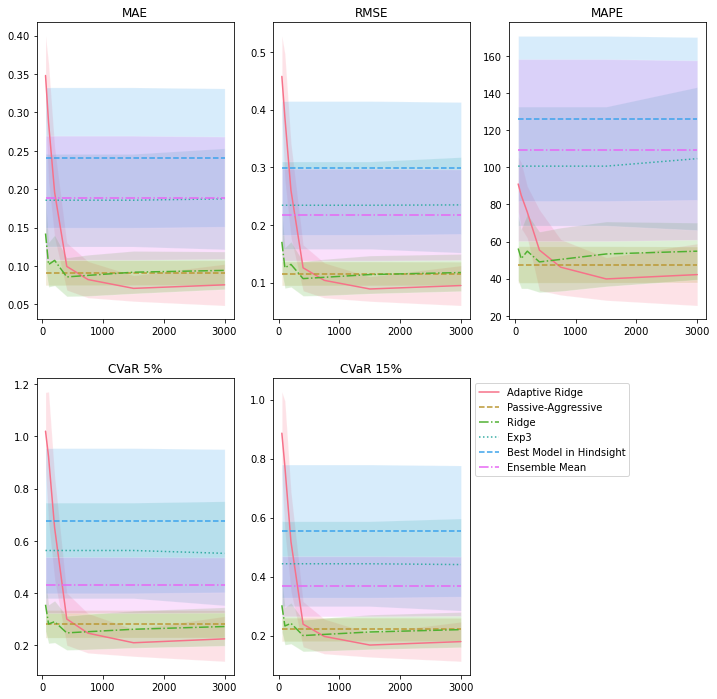

In [13]:
get_plots(df, 'Train_Length', [0.01, 0.001])

No handles with labels found to put in legend.


,Train_Length,Time (s)
0,51,0.271933
1,101,0.435833
2,201,0.602833
3,401,1.313600
4,751,63.638167
5,1501,92.489700
6,3001,851.830156


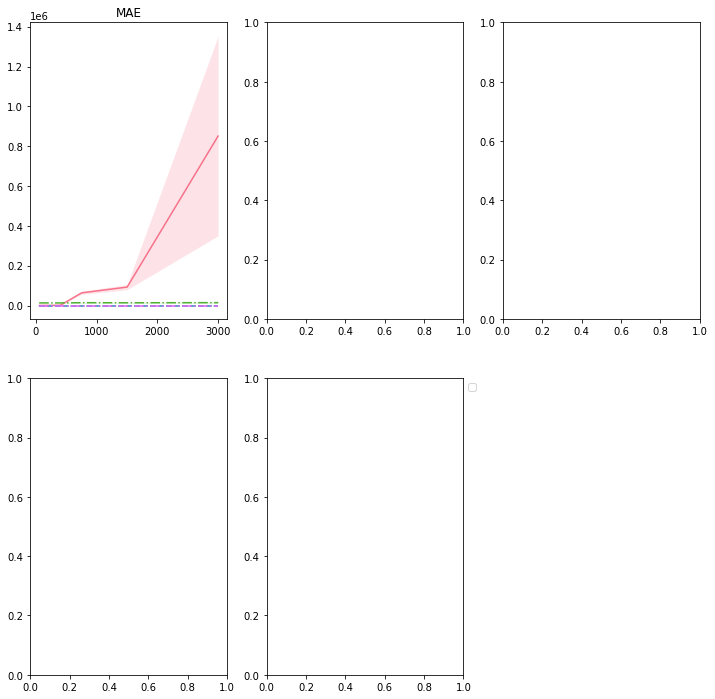

In [58]:
df_time, _,_,_ = get_plots(df, 'Train_Length', [0.01], metrics = ['Time'], save = False)
df_time

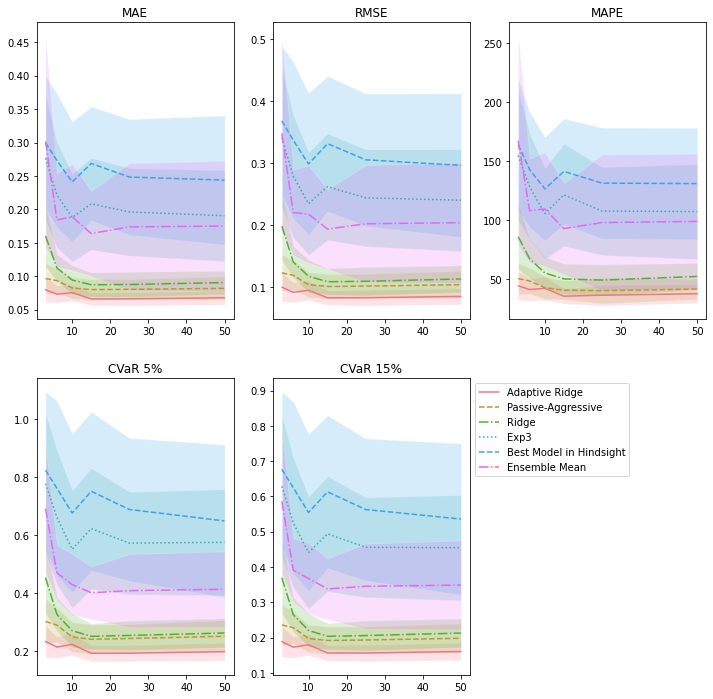

In [35]:
get_plots(df, 'N_models', [0.01, 0.1])

No handles with labels found to put in legend.


,N_models,Time (s)
0,3,6.872867
1,6,51.272133
2,10,851.830156
3,15,236.036800
4,25,236.095900
5,50,250.965067


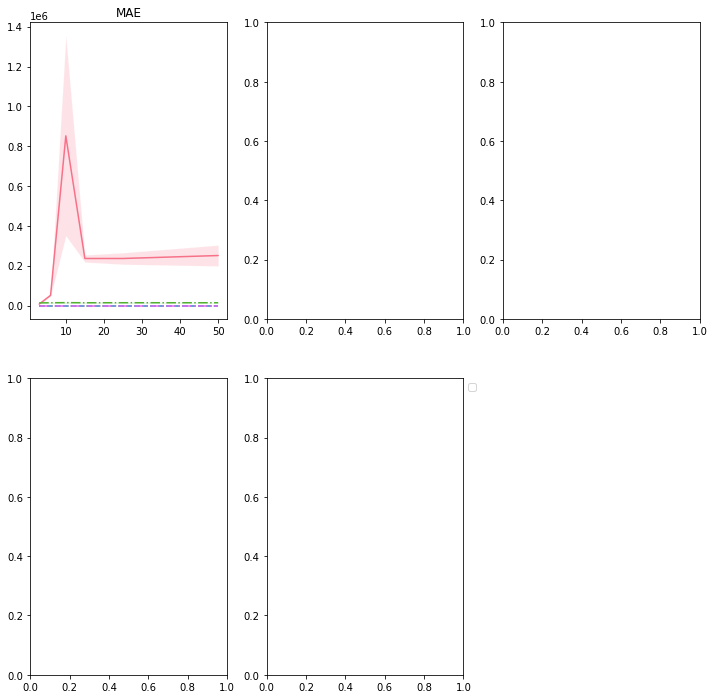

In [57]:
df_time, _,_,_ = get_plots(df, 'N_models', [0.01], metrics = ['Time'], save = False)
df_time

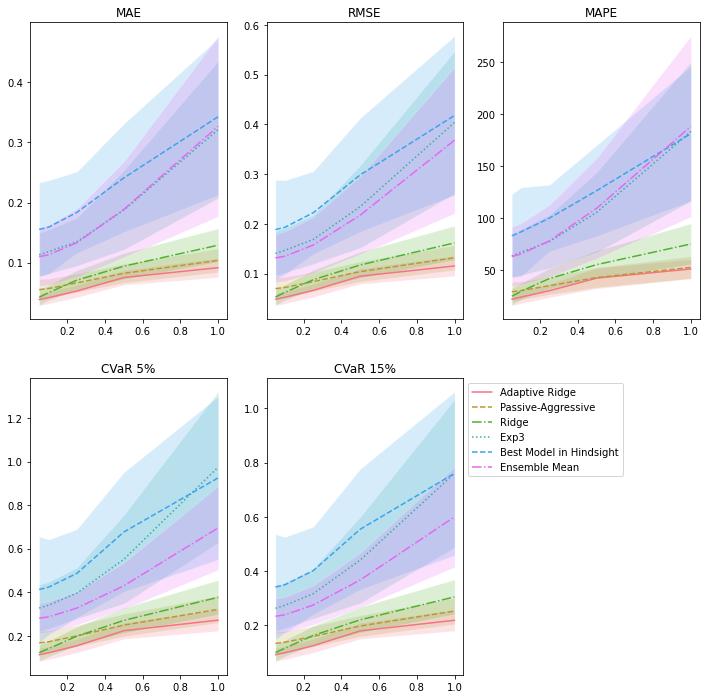

In [44]:
get_plots(df, 'Bias_Drift_range', [0.01, 0.1])

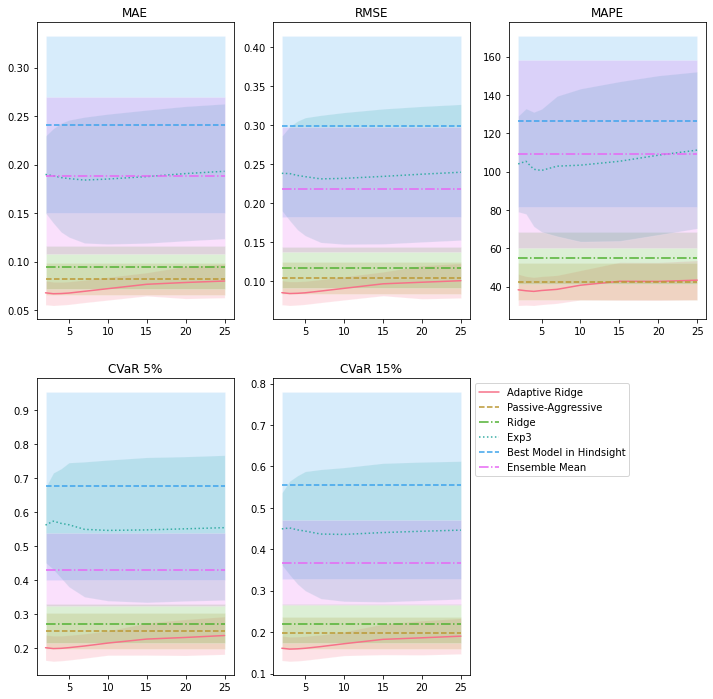

In [45]:
get_plots(df, 'Past', [0.01, 0.1])

No handles with labels found to put in legend.


,Past,Time (s)
0,2.0,53.258000
1,3.0,99.695067
2,4.0,163.385700
3,5.0,239.103467
4,7.0,356.086200
5,10.0,603.031800
6,15.0,1079.358533
7,20.0,1471.989733
8,25.0,1361.411200


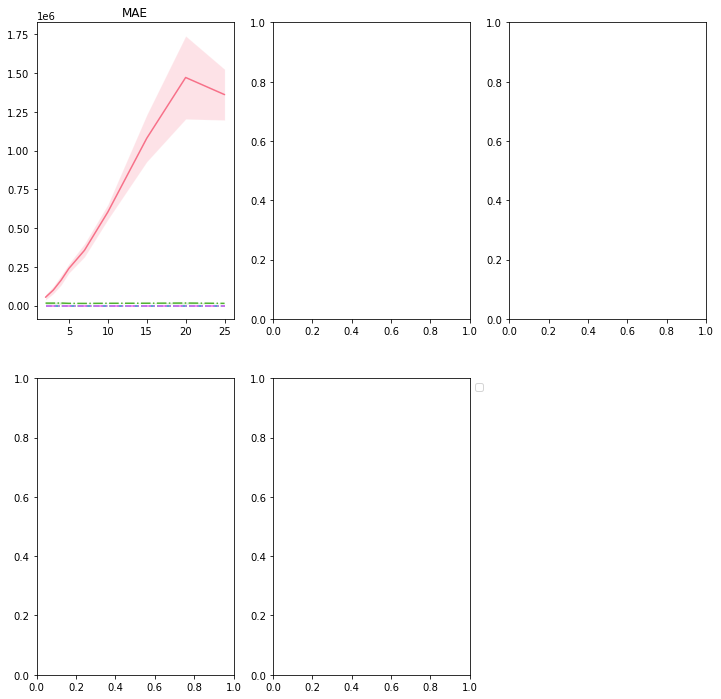

In [60]:
df_time, _, _, _ = get_plots(df, 'Past', [0.01], metrics = ['Time'], save = False)
df_time

# Energy dataset check models

In [44]:
energy = pd.read_csv("data/energy_predictions_test_val.csv")
y_energy = np.array(pd.read_csv("data/energy_y_test_val.csv", header=None))

In [49]:
e2 = energy[['BayesianRidge', 'ElasticNetCV', 'HuberRegressor', 'LarsCV', 'LassoCV', 'LassoLarsCV', 'LinearSVR', 'OrthogonalMatchingPursuitCV', 'RidgeCV', 'LinearRegression']]

In [52]:
e2.to_csv("data/energy_predictions_test_val2.csv")

In [38]:
from sklearn.metrics import mean_absolute_error

In [46]:
for c in energy.columns:
    print(c, mean_absolute_error(y_energy[:4500], energy[c][:4500]))

Unnamed: 0 2156.3804444444445
BayesianRidge 28.980545523585103
ElasticNet 31.466302316157172
ElasticNetCV 28.475895183223074
GammaRegressor 33.45847111627269
GeneralizedLinearRegressor 33.276475889774225
HistGradientBoostingRegressor 34.72244117401516
HuberRegressor 25.807919992533343
LarsCV 28.01268050429965
Lasso 28.076468530954692
LassoCV 28.024177404110294
LassoLarsCV 28.033925868867126
LassoLarsIC 27.918953074328716
LinearRegression 30.430420910153824
LinearSVR 25.69630120710319
MLPRegressor 39.0448137872336
OrthogonalMatchingPursuit 27.55690079484259
OrthogonalMatchingPursuitCV 28.45357255424244
PoissonRegressor 33.01812154832914
Ridge 29.91521330994308
RidgeCV 29.23922260511713
SGDRegressor 34.875583430997786
TransformedTargetRegressor 30.430420910153824
TweedieRegressor 33.276475889774225
LGBMRegressor 34.78494859780876


In [40]:
y_energy

,6.000000000000000000e+01
0,60.0
1,50.0
2,50.0
3,40.0
4,40.0
...,...
9859,100.0
9860,90.0
9861,270.0
9862,420.0


In [37]:
y_energy

,6.000000000000000000e+01
0,60.0
1,50.0
2,50.0
3,40.0
4,40.0
...,...
9859,100.0
9860,90.0
9861,270.0
9862,420.0


# Old Code

In [12]:
def get_results(df):
    res = df.groupby(['Method', 'Rho', 'Rho_beta', 'Bias_Drift_range', 'Std_Drift_Range', 'N_models', 'Train_Length', 'Past']).mean()
    
    return res[['MAE', 'MAPE', 'RMSE', 'CVAR_05', 'CVAR_15']]
df_2 = df.loc[df['Period'] == 4]
df3 = df_2.loc[df_2['Test_Length'] < 1100]
df4 = df3.loc[df3['Train_Length'] < 2100]
df5 = df4.loc[df4['Bias_Drift_range'] == df4['Std_Drift_Range']]
df6 = df5.loc[df5['Past'] == 5]
res = get_results(df6)
res[20:80]
res['MAE'][20:80]

Method                            Rho    Rho_beta  Bias_Drift_range  Std_Drift_Range  N_models  Train_Length  Past
adaptive_ridge_exact              0.001  0.001     0.5               0.5              10        201           5.0     0.147809
                                                                                                401           5.0     0.098547
                                                                                                751           5.0     0.072850
                                                                                                1501          5.0     0.056225
                                  0.010  0.010     0.5               0.5              10        51            5.0     0.540861
                                                                                                101           5.0     0.219123
                                                                                                201           5.0     0.135

In [8]:
metric = 'MAPE'
rhos = [0.01, 0.001, 0.1]
results = get_results(df, rho = 0.1, rho_beta = 0.1, bias_drift_min = 0, bias_drift_max = 1.4)
scores = results.groupby(['Method', 'Bias_Drift_range']).mean()[metric]
std_scores = results.groupby(['Method', 'Bias_Drift_range']).std()[metric]

#reshaping
scores_ = np.array(scores.values.reshape(11, -1))
std_scores_ = np.array(std_scores.values.reshape(11, -1))

scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)

In [9]:
metric = 'MAPE'
rhos = [0.01, 0.001, 0.1]
results = get_results(df.sort_values(by=['Train_Length']), rho = 0.01, rho_beta = 0.01, train_length_max=3005, train_length_min=0)
scores = results.groupby(['Method', 'Train_Length']).mean()[metric]
std_scores = results.groupby(['Method', 'Train_Length']).std()[metric]

#reshaping
scores_ = np.array(scores.values.reshape(11, -1))
std_scores_ = np.array(std_scores.values.reshape(11, -1))

scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)

In [10]:
metric = 'MAPE'
rhos = [0.01, 0.001, 0.1]
results = get_results(df.sort_values(by=['Past']), rho = 0.01, rho_beta = 0.01, past_min = 0, past_max = 60)
scores = results.groupby(['Method', 'Past']).mean()[metric]
std_scores = results.groupby(['Method', 'Past']).std()[metric]

#reshaping
scores_ = np.array(scores.values.reshape(11, -1))
std_scores_ = np.array(std_scores.values.reshape(11, -1))

scores_ = pd.DataFrame(scores_.transpose(), columns = labels)
std_scores_ = pd.DataFrame(std_scores_.transpose(), columns = labels)

ValueError: operands could not be broadcast together with shapes (9,) (8,) 

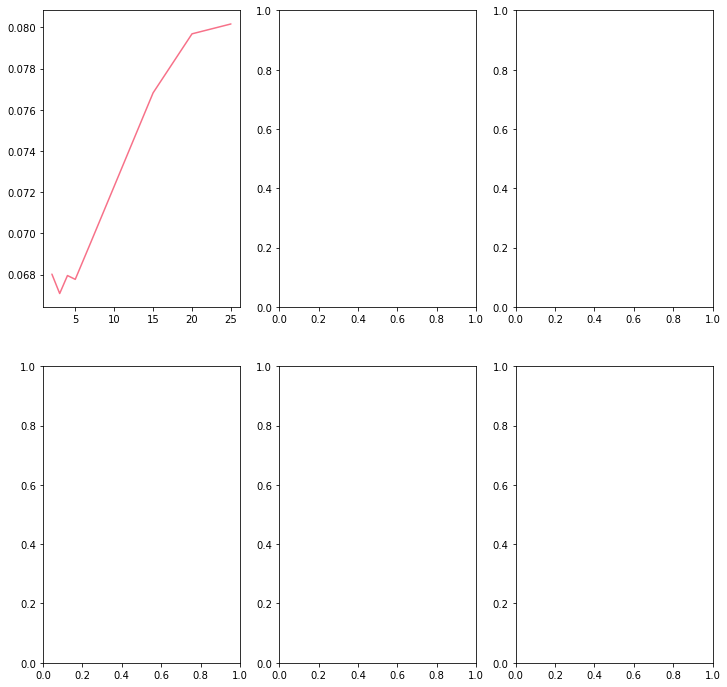

In [211]:
get_plots(df, 'Past', [0.01, 0.1])

In [77]:
(scores_, std_scores_), vals_ = get_scores_experiment(df, 'MAE', 'N_models')

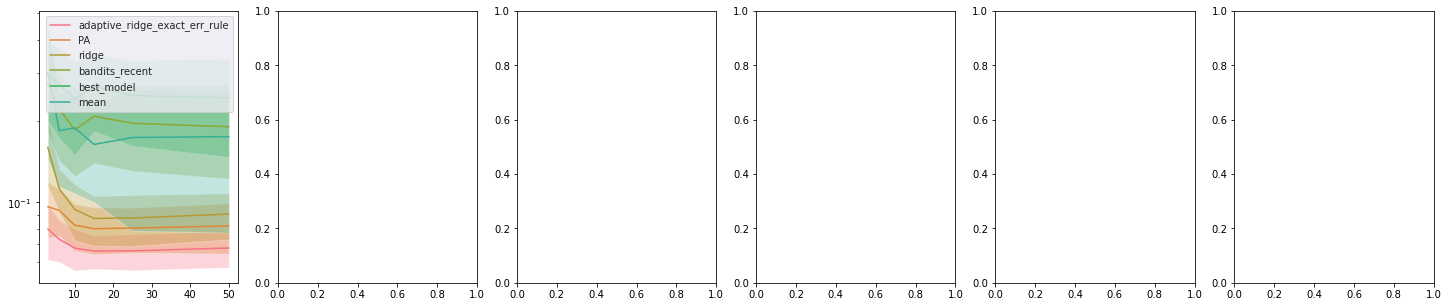

In [98]:
fig, ax = plt.subplots(1, 6, figsize=(25, 5))
clrs = sns.color_palette("husl", len(labels))
with sns.axes_style("darkgrid"):
    vals = vals_#[0.05, 0.1, 0.25, 0.5, 1]
    col = 0
    for i in labels_choice:
        meanst = np.array(scores_[i])
        sdt = np.array(std_scores_[i])
        ax[0].plot(vals, meanst, label=i, c=clrs[col])
        ax[0].fill_between(vals, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[col])
        col+=1
    ax[0].legend()
    ax[0].set_yscale('log')

In [ ]:
#TODO: get best model performance

In [18]:
scores_

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,29.611507,22.134769,21.835588,20.383911,20.141322,83.337718,63.311663,82.875078,57.860884,62.854402,24.646074
1,31.657732,24.356345,23.855894,23.964358,23.548681,86.903309,67.086342,86.701302,57.860884,65.336486,29.385068
2,38.541970,30.366290,29.960471,30.631074,30.223271,108.365759,77.316077,99.914072,57.860884,77.990433,41.712844
3,47.651094,38.046941,38.041518,37.655492,37.901547,145.738616,100.627611,126.278123,57.860884,109.276134,55.034398
4,59.029446,50.323812,50.907357,50.446358,51.332313,196.919587,183.329049,181.213092,57.860884,188.179219,74.951380


In [31]:
s = scores_
st = std_scores_

In [29]:
std_scores_

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,9.241587,7.609750,7.775830,8.709293,8.757824,45.830653,20.305651,39.879067,0.0,28.624382,9.676390
1,8.815106,7.146111,7.300773,8.180273,8.178446,43.090277,22.096041,42.723607,0.0,29.713865,9.088333
2,8.463531,7.017448,7.117832,7.801396,7.926103,40.861429,25.498354,32.098858,0.0,34.754115,11.949952
3,9.741852,8.278998,8.807086,9.129177,9.711282,59.249801,32.021490,44.463053,0.0,48.994347,15.540551
4,10.692790,11.643063,11.954922,11.992548,11.955394,73.646788,66.939530,65.028471,0.0,87.089047,23.063537


In [14]:
def get_plots(df, mode, rhos = [0.01, 0.1], metrics = ['MAE', 'RMSE', 'MAPE', 'CVAR_05', 'CVAR_15', 'Time']):
    labels_choice = ['adaptive_ridge_exact_err_rule', 'PA', 'ridge', 'bandits_recent', 'best_model', 'mean']
    fig, ax = plt.subplots(2, 3, figsize=(12, 12))
    clrs = sns.color_palette("husl", len(labels_choice))
    for k in range(len(metrics)):
        metric = metrics[k]
        a = k//3 
        b = k%3
        scores_, std_scores_, vals = get_scores_experiment(df, metric, mode, rhos)
        with sns.axes_style("darkgrid"):
            #[0.05, 0.1, 0.25, 0.5, 1]
            col = 0
            for i in labels_choice:
                meanst = np.array(scores_[i])
                sdt = np.array(std_scores_[i])
                ax[a,b].plot(vals, meanst, label=i, c=clrs[col])
                ax[a,b].fill_between(vals, meanst-sdt, meanst+sdt ,alpha=0.2, facecolor=clrs[col])
                col+=1
            ax[0,0].legend()
            ax[a,b].set_title(metric)
            #ax[a,b].set_yscale('log')

In [33]:
std_scores_.where(s < scores_, st)

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,9.241587,6.143783,6.145651,7.394486,7.891559,45.830653,20.305651,39.879067,0.0,28.624382,8.155439
1,8.815106,6.058880,5.957327,7.059161,7.362195,43.090277,22.096041,42.723607,0.0,29.713865,7.884633
2,8.463531,6.627793,6.335713,7.584369,7.732301,40.861429,25.498354,32.098858,0.0,34.754115,9.922193
3,9.741852,7.105610,7.349156,8.024586,9.193322,59.249801,32.021490,44.463053,0.0,48.994347,13.759721
4,10.692790,8.495274,9.274814,11.992548,11.955394,73.646788,66.939530,65.028471,0.0,87.089047,19.719877


In [43]:
b

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,9.241587,6.143783,6.145651,7.394486,7.891559,45.830653,20.305651,39.879067,0.0,28.624382,8.155439
1,8.815106,6.058880,5.957327,7.059161,7.362195,43.090277,22.096041,42.723607,0.0,29.713865,7.884633
2,8.463531,6.627793,6.335713,7.584369,7.732301,40.861429,25.498354,32.098858,0.0,34.754115,9.922193
3,9.741852,7.105610,7.349156,8.024586,9.193322,59.249801,32.021490,44.463053,0.0,48.994347,13.759721
4,10.692790,8.495274,9.274814,11.992548,11.955394,73.646788,66.939530,65.028471,0.0,87.089047,19.719877


In [20]:
pd.concat([s, scores_]).min(level=0)

,PA,adaptive_ridge_exact,adaptive_ridge_exact_err_rule,adaptive_ridge_standard,adaptive_ridge_standard_err_rule,bandits_full,bandits_recent,best_model,last_timestep,mean,ridge
0,28.937433,22.134769,21.835588,20.383911,20.141322,83.337718,63.311663,82.875078,57.860884,62.854402,24.646074
1,30.100812,24.356345,23.855894,23.964358,23.548681,86.903309,67.086342,86.701302,57.860884,65.336486,29.385068
2,34.795297,30.366290,29.960471,30.631074,30.223271,108.365759,77.316077,99.914072,57.860884,77.990433,41.712844
3,42.599111,38.046941,38.041518,37.655492,37.901547,145.738616,100.627611,126.278123,57.860884,109.276134,55.034398
4,52.388907,50.323812,50.907357,47.041111,48.651966,196.919587,183.329049,181.213092,57.860884,188.179219,74.951380


In [25]:
get_results(df, rho = 0.0, rho_beta = 1).groupby(['Method']).mean()

,MAE,MAPE,RMSE,CVAR_05,CVAR_15,Time
Method,,,,,,
PA,0.191777,107.813045,0.221928,0.441243,0.375874,0.000000
adaptive_ridge_exact,0.117739,50.836503,0.149788,0.342562,0.284879,298672.310345
adaptive_ridge_exact_err_rule,0.095992,45.956793,0.119745,0.276749,0.225054,238683.206897
adaptive_ridge_standard,0.072417,40.616220,0.091438,0.217012,0.173644,190814.586207
adaptive_ridge_standard_err_rule,0.072419,40.609328,0.091441,0.217014,0.173648,196120.034483
bandits_full,0.252345,144.751214,0.302226,0.645772,0.537065,0.000000
bandits_recent,0.183561,99.059003,0.231319,0.555699,0.438311,0.000000
best_model,0.236989,124.628348,0.293314,0.664424,0.544240,0.000000
last_timestep,0.110999,57.860884,0.140048,0.336577,0.266247,0.000000


In [31]:
res[6:40]

,,,MAE,MAPE,RMSE,CVAR_05,CVAR_15
Method,Rho,Rho_beta,,,,,
bandits_recent,0.1,0.1,0.173253,807.071043,0.222903,0.557048,0.430441
best_model,0.1,0.1,0.389372,720.227605,0.478532,1.054479,0.878254
last_timestep,0.1,0.1,0.115565,606.165310,0.145926,0.346479,0.278831
mean,0.1,0.1,0.286389,1217.813079,0.339129,0.666105,0.582891
ridge,0.1,0.1,0.064348,511.778976,0.079436,0.178800,0.146845


In [7]:
df_2 = df[df['Period'] == 1]
res = get_results(df_2)
res

,MAE,MAPE,RMSE,CVAR_05,CVAR_15
Method,,,,,
PA,0.060378,567.674762,0.076469,0.183951,0.145797
adaptive_ridge_exact,0.062381,598.504245,0.077863,0.180736,0.146320
adaptive_ridge_exact_err_rule,0.063007,579.724710,0.078607,0.181811,0.147559
adaptive_ridge_standard,0.060404,577.946309,0.074788,0.170291,0.138958
adaptive_ridge_standard_err_rule,0.060000,570.368915,0.074557,0.170969,0.139124
bandits_full,0.325423,2273.127103,0.390002,0.808167,0.689619
bandits_recent,0.189838,1394.906212,0.244465,0.608526,0.472711
best_model,0.376317,1216.198519,0.459927,0.997465,0.836375
last_timestep,0.113173,399.234830,0.142825,0.340441,0.272426


In [41]:
df.groupby(['Seed']).count()

,Dataset,Train_Length,Test_Length,Std_Pert_y,Bias_Range,Std_Range,Bias_Drift_range,Std_Drift_Range,y_Bias_Drift_range,y_Std_Drift_Range,...,Val,Train_test_split,Method,MAE,MAPE,RMSE,R2,CVAR_05,CVAR_15,Time
Seed,,,,,,,,,,,,,,,,,,,,,
1,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
2,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
3,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
4,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
5,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
6,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
7,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
8,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
9,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165


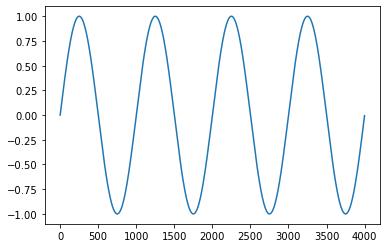

In [23]:
period = 2
T = 2000
y_base = [np.sin(2*np.pi*period*t/T) for t in range(2*T)]
plt.plot(y_base)

In [4]:
number_of_wins = np.zeros(11)
for i in range(1402,2830):
    filter2 = df["Method"] != 'bandits_recent'
    filter3 = df["Method"] != 'best_model'
    try:
        filter1 = df["Dataset"] == 'M3F'+str(i)
        df_new = df.where(filter1 & filter2 & filter3)
        ind = df_new[df_new["Dataset"] == 'M3F'+str(i)].MAPE.idxmin()
        number_of_wins[ind] += 1
    except:
        pass
print(number_of_wins)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
